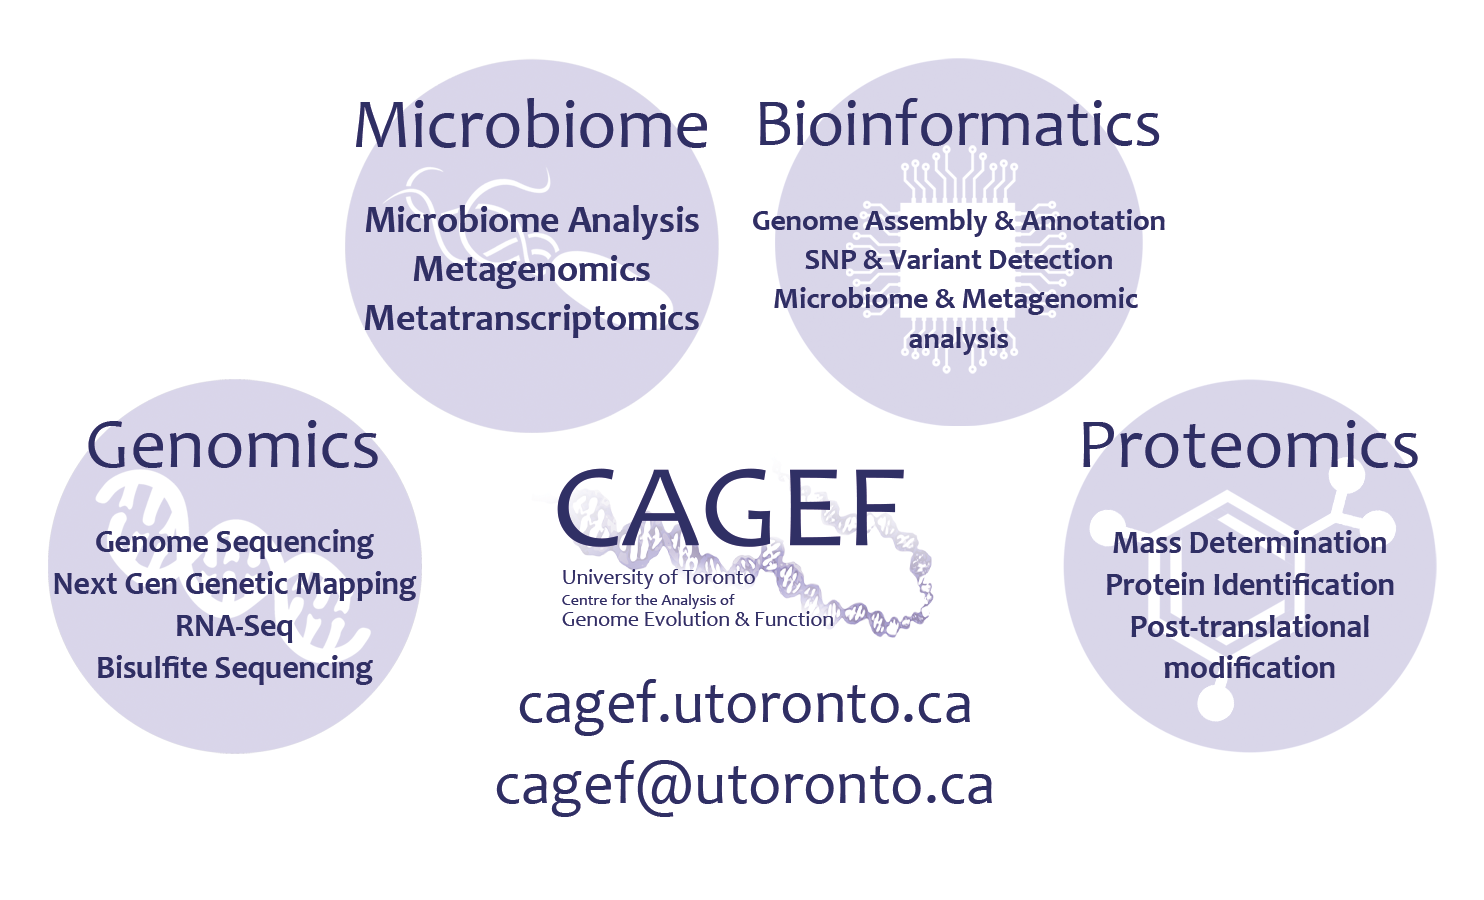

# Advanced Graphics and Data Visualization in R

# Assignment 01: Practicing with tidy data principles and graphic visualizations

***
## 0.1.0 An overview of Advanced Graphics and Data Visualization in R

__"Advanced Graphics and Data Visualization in R"__ is brought to you by the Centre for the Analysis of Genome Evolution & Function's (CAGEF) bioinformatics training initiative. This CSB1021 was developed to enhance the skills of students with basic backgrounds in R by focusing on available philosophies, methods, and packages for plotting scientific data. While the datasets and examples used in this course will be centred on SARS-CoV2 epidemiological and genomic data, the lessons learned herein will be broadly applicable.

This assignment is the first in a 6-part series. The aim for the end of this series is for students to recognize how to import, format, and display data based on their intended message and audience. The format and style of these visualizations will help to identify and convey the key message(s) from their experimental data.

At the start of each lecture, assignments will be provided for use on the [University of Toronto Jupyter Hub](https://jupyter.utoronto.ca/hub/login) so students can apply and familiarize themselves with the material from the lecture.

***
## 0.2.0 Lecture review

This week's lecture focused on refreshing your skills in R and reviewing helpful verbs from the `tidyverse` package. Most importantly we focused on

1. Converting datasets from wide-format to long-format
2. Redirecting output to functions with `%>%`
3. Trimming and updating text to be more concise
3. Generating basic plots with ggplot

***
## 0.3.0 A legend for text format in Jupyter markdown

`grey background` - a package, function, code, command or directory. Backticks are also use for in-line code.      
*italics* - an important term or concept or an individual file or folder     
**bold** - heading or a term that is being defined      
<span style="color:blue">blue text</span> - named or unnamed hyperlink

`...` - Within each coding cell this will indicate an area of code that students will need to complete for the code cell to run correctly. 

***
## 0.4.0 Data used in this assignment

Today's datasets will focus on epidemiological data from the Ontario provincial government found [here](https://data.ontario.ca/dataset/status-of-covid-19-cases-in-ontario). 

### 0.4.1 Dataset 1: Ontario_covidtesting.csv

This dataset was obtained from the Ontario provincial website and holds statistics regarding SARS-CoV-2 throughout the province. It is in a comma separated format and has been growing/expanding since initial tracking started on 2020-01-26.

### 0.4.1 Dataset 2: region_hospital_icu_covid_data.csv

This dataset was obtained from the Ontario provincial website and holds data regarding SARS-CoV-2 throughout 5 Ontario health regions. It is in a comma-separated format and has been growing/expanding since initial tracking started on 2020-04-02. This is a simpler dataset compared to `Ontario_covidtesting.csv` as it only tracks 7 variables rather than 28.

***
## 0.5.0 Packages used in this assignment (2 points)

`repr`- a package useful for altering some of the attributes of objects related to the R kernel.

`tidyverse` which has a number of packages including `dplyr`, `tidyr`, `stringr`, `forcats` and `ggplot2`

`viridis` helps to create color-blind palettes for our data visualizations

`lubridate` and `zoo` are helper packages used for working with date formats in R

Please load these packages!

In [ ]:
# Load your packages here
...

# load object data
load("data/Assignment01.RData")

***
# 1.0.0 What are the trends surrounding hospitalization? 

## 1.1.0 Tidying data and visualization (2 points)

Let's take a look at another dataset from Ontario. Rather than breaking down cases by public health unit, this tracks total cases across Ontario along with different categories such as hospitalizations, long-term care facilities, and some of the more recent variants.

Looking deeply at the variant information, it appears that Ontario begins tracking variant data on 2021-01-29. Let's build a dataset from that point onwards.

Open the dataset located in the `./assignment/data` subfolder titled `Ontario_covidtesting.csv` and look at the structure.

In [ ]:
# Open your dataset with read_csv
covid_cases.df <- ...

# Look at the structure of covid_cases.df
...

***
## 1.2.0 Clean up your column names

As you can see all of the column names are problematic for working with. We should replace all of the white-space characters and dashes with the undescore character. The R interpreter hates white space and we can't work with the column names directly until we fix this issue.

Pipe your data through the `rename_with()` by simultaneously converting titles with `str_to_lower()` and `str_replace_all()`. We'll also introduce the other meaning of `~` when used in conjunction with the `purrr` package.

### 1.2.0.1 Convert the column names to lower case with `str_to_lower()` (2 points)

Complete the following code to produce a lower case conversion of the column names to standard output.

In [ ]:
# An example of how to use str_to_lower()
covid_cases.df  %>% 
... # access the column names 
... # convert them to lower case 

***
### 1.2.0.2 Replace all occurences of the lower case `s` and `d` with an upper case `S` (2 points)

Complete the following code to replace all instances of the lower case `s` and `d` with an upper case `S` using the `str_replace_all()` function. You'll need to explicity name all of the parameters

In [ ]:
# An example of how to use gsub. Replace all "s" with a "S" sign
covid_cases.df %>% 
... %>%             
str_replace_all(...)

***
### 1.2.0.3 Combine your functions with `rename_with()` command (2 points)

Now that you've seen how both functions works separately, is there a way to combine them with other commands? How do we use either of `str_to_lower()` or `str_replace_all()` in combination with the `rename_with()` command? Take a look at the command with `?rename_with` and look at the argument input.

What do the `...` mean as an argument? These give the function flexibility for parameters by allowing the programmer to input any additional parameters needed for `.fn` which is the function being use to transform our column names.

Try using `rename_with()` in combination with `str_to_lower()` which doesn't necessarily require additional parameters (aside from a string) to function. Compare this to the provided example which explicitly names the `locale` parameter of that same function.  

In [ ]:
?rename_with

In [ ]:
# Convert your columns to lowercase through the rename_with() command
covid_cases.df %>% 
rename_with(., ...) %>%   
colnames() # Take a look at the column names 

In [ ]:
# Convert your columns to lowercase using multiple parameters for str_to_lower
covid_cases.df %>% 
rename_with(., ..., locale=...) %>% 
colnames() # Take a look at the column names

***
### 1.2.0.4 Run commands sequentially to avoid spaghetti code (4 points)

Now that you've seen how to take advantage of needing extra parameters, complete the transformation of the column names using both the `str_to_lower()` and `str_replace_all()` using sequential calls to `rename_with()`. Using sequential calls rather than trying to nest the calls make our code more friendly to other readers. There is, however, a way to combine it all into a single line.

Note: We want to replace any spaces ` ` and dashes `-` in our column names with underscores. The `-` isn't acceptable in variable names with R as it will also conflict with the interpreter as a mathematical operation between variables.

In [ ]:
covid_cases.df %>% 
# convert to lower case 
rename_with(., ...) %>%                        
# replace the spaces and - with _
rename_with(., ...,                          
            pattern=...,                     
            replacement= ...) %>%            
colnames() # Take a look at the column names

***
### 1.2.0.5 Anonymous functions in R (2 points)

Look we did it and it makes sense. But it produces some slightly redundant code. It's really not a problem but there are some other ways we could have approached this problem.

We have previously encountered the use of anonymous functions in R when using other functions such as `sapply()` where we wish to perform a certain function over a list or vector of objects. Since `sapply()` breaks our input into chunks and feeds it into a function, we can see it in the form:

```
sapply(1:10, function(x) x + 1L)
```
The above code applies our function on the numbers 1 to 10. We can actually declare these anonymous functions inside certain other functions to define how we want to interact with data without having to declare a function previously such as

```
function(.x) {
    .x + 1
}
```

Rather than performing multiple calls to `rename_with()` we can instead create a complex function that performs a series of functions on our data. To do so, we'll want to declare an anonymous function within our `rename_with()` call. Recall that R will evaluate the inner parentheses first before moving to the outer set. In this case we will call `str_replace_all()` within the `str_to_lower()` function.

In [ ]:
# rename the columns to remove the spaces
covid_cases.df %>% 
# remove the s and d and replace with XYZ, then convert to lower case
rename_with(., 
             # we declare an anonymous function and it's parameters
            .fn = function(x, pattern=..., replacement=...)              
                # explicitly define the function and parameters
                str_to_lower(...(..., pattern , replacement))) %>%      
colnames() # Take a look at the column names

***
### 1.2.0.6 The `purrr` package simplifies anonymizing functions with `~` (2 points)

As you can see, the code from above _works_ but it can be messy and really takes up as much space as previously. We can simplify all of that syntax by taking advantage of the `purrr` package which helps to simplify that function declaration and collapses it using the `~` symbol. 

In this case the `~` predefines it's function parameter as `.x` and allows you to use a `.y` if needed in the definition of the function. Notice how we feed the parameters directly into the function definition this time?

In [ ]:
# rename the columns to remove the spaces
covid_cases.df %>% 
# remove the s and d and replace with XYZ, then convert to lower case
rename_with(., ~ ...(                                         
                              ...(string = .x,               
                                              pattern=...,             
                                              replacement=...))) %>%  
colnames() # Take a look at the column names

***
### 1.2.0.7 Try the full conversion and save the updated result (4 points)

Now that you have an example of how to use the `~` for anonymous functions, give it a try on our original data frame with the intention to:

1. Convert column names to lower case
2. Replace all spaces and dashes `-` with the underscore `_`
3. Save the result to `covid_cases.df`

In [ ]:
# Save the result to our original data frame
covid_cases.df <- covid_cases.df %>% 
# rename the columns to replace the spaces and dashes and convert to lower case
rename_with(., ...(                                        
                              ...(string = .x,            
                                              pattern=...,      
                                              replacement= ...)))     

# print out the column names
print(colnames(covid_cases.df))

***
# 2.0.0 What questions can we ask about this data?

Now that we've fixed up our column names a bit, we can turn our eyes to answering some questions with the actual data. There are a number of variables reported in this data but the important columns we want to remember are:

1. reported_date: this will ground our observations on a time-based axis
2. total_cases: this is a growing tally of the daily cases as they appear across Ontario.
3. number_of_patients_hospitalized_with_covid_19: total patients still hospitalized that day.
4. number_of_patients_in_icu_due_to_covid_19: total COVID-related patients in ICU as a subset of hospitalized patients.
5. number_of_patients_in_icu_on_a_ventilator_due_to_covid_19: total ICU patients on ventilators.


## 2.1.0 Generate daily totals of hospitalization categories (4 points)

Columns 13, 14, 17 represent hospitalization data that we could use to get an estimate of how well we are able to treat cases of SARS-CoV-2 within Ontario. Let's begin by investigating the number of hospital cases across Ontario. If we presume that our above interpretation of the hospitalized data is correct then we want to know the daily breakdown of:

- `total_hospitalized`: how many patients are hospitalized with COVID-19
- `non_ICI`: how many of the above patients are not in the ICU
- `ICU_unventilated`: how many COVID-related ICU patients are not ventiliated
- `ICU_ventilated`: how many COVID-related ICU patients are ventilated

We wish to end up with a table named `hospital_cases.df` that looks like this:

|reported_date|total_hospitalized|non_ICU|ICU_unventilated|ICU_ventilated|
| :-: | :-: | :-: | :-: | :-: |
| ... | ... | ... | ... | ... | 

There are a number of ways to accomplish this but you should consider using _some_ of these `dplyr` verbs to simplify your life:
- `select()`
- `rename_with()`
- `mutate()`
- `transmute()`

Please use the `covid_cases_tidy.df` object imported from `data/Assignment01.RData` and remember to comment your code!

In [ ]:
hospital_cases.df <- 
covid_cases_tidy.df %>% 
# Choose only the relevant columns
... %>%                                                              

# clean up the column names so that they aren't nearly as long
rename_with(., str_replace_all,                                                  
            pattern=..., 
            replacement = ...) %>% 

# Transmute makes new columns in a new data frame (like select + mutate)
transmute(reported_date = reported_date,             
          total_hospitalized = ...,                             
          non_ICU = ...,                       
          ICU_unventilated = ...,    
          ICU_ventilated = ...                     
         )

# Output the tail end of the new data frame
tail(hospital_cases.df)

***
### 2.1.2 Convert your data from a wide to a long format (4 points)

Now that we have our data in a slightly better format, we can pivot it to a long format by collapsing our 3 hospital categories into a single one leaving us with a table that looks like this:

|reported_date|total_hospitalized|hospital_status|patients|
| :-: | :-: | :-: | :-: | 
| ... | ... | ... | ... |  

where `hospital_status` is one of three cetegories and `patients` represent the number of patients in that category for the `reported_date`.

Save the converted table as `hospital_cases_long.df` after you've removed any cases where `NA` are present. We only want to deal with data once it has started to be recorded into our dataset. Some verbs to consider reading about and using:

- `pivot_longer()`
- `filter()`
- `complete.cases()`


In [ ]:
# multiple verbs
hospital_cases_long.df <- 
hospital_cases.df %>% 
...

***
## 2.2.0 Graph our hospital data as an area graph (10 points)

Now that we have our data in long format, please generate an area graph of daily patients for the 3 hospital status groups, colouring them with a colour-blind friendly palette. This should perform similar to a stacked bar graph but look simpler from the code. Use `theme_bw()` to clean your background up and remember to match the appropriate labels for your axes, title, and legends.

Don't forget to format your factor so that "non_ICU" patients end up on top. `fct_reorder()` will be helpful to you in this instance.

Use the data frame `hospital_cases_tidy.df` loaded from `data/Assignment01.RData` to replicate the following graph to standard output as closely as possible. Colours are less relevant but legend group order, axis scale, and titles should be correct. Points will be subtracted for missing elements.

___Hints:___ 
- Axis text is at size 20!
- The data begins at 01 December 2020

***
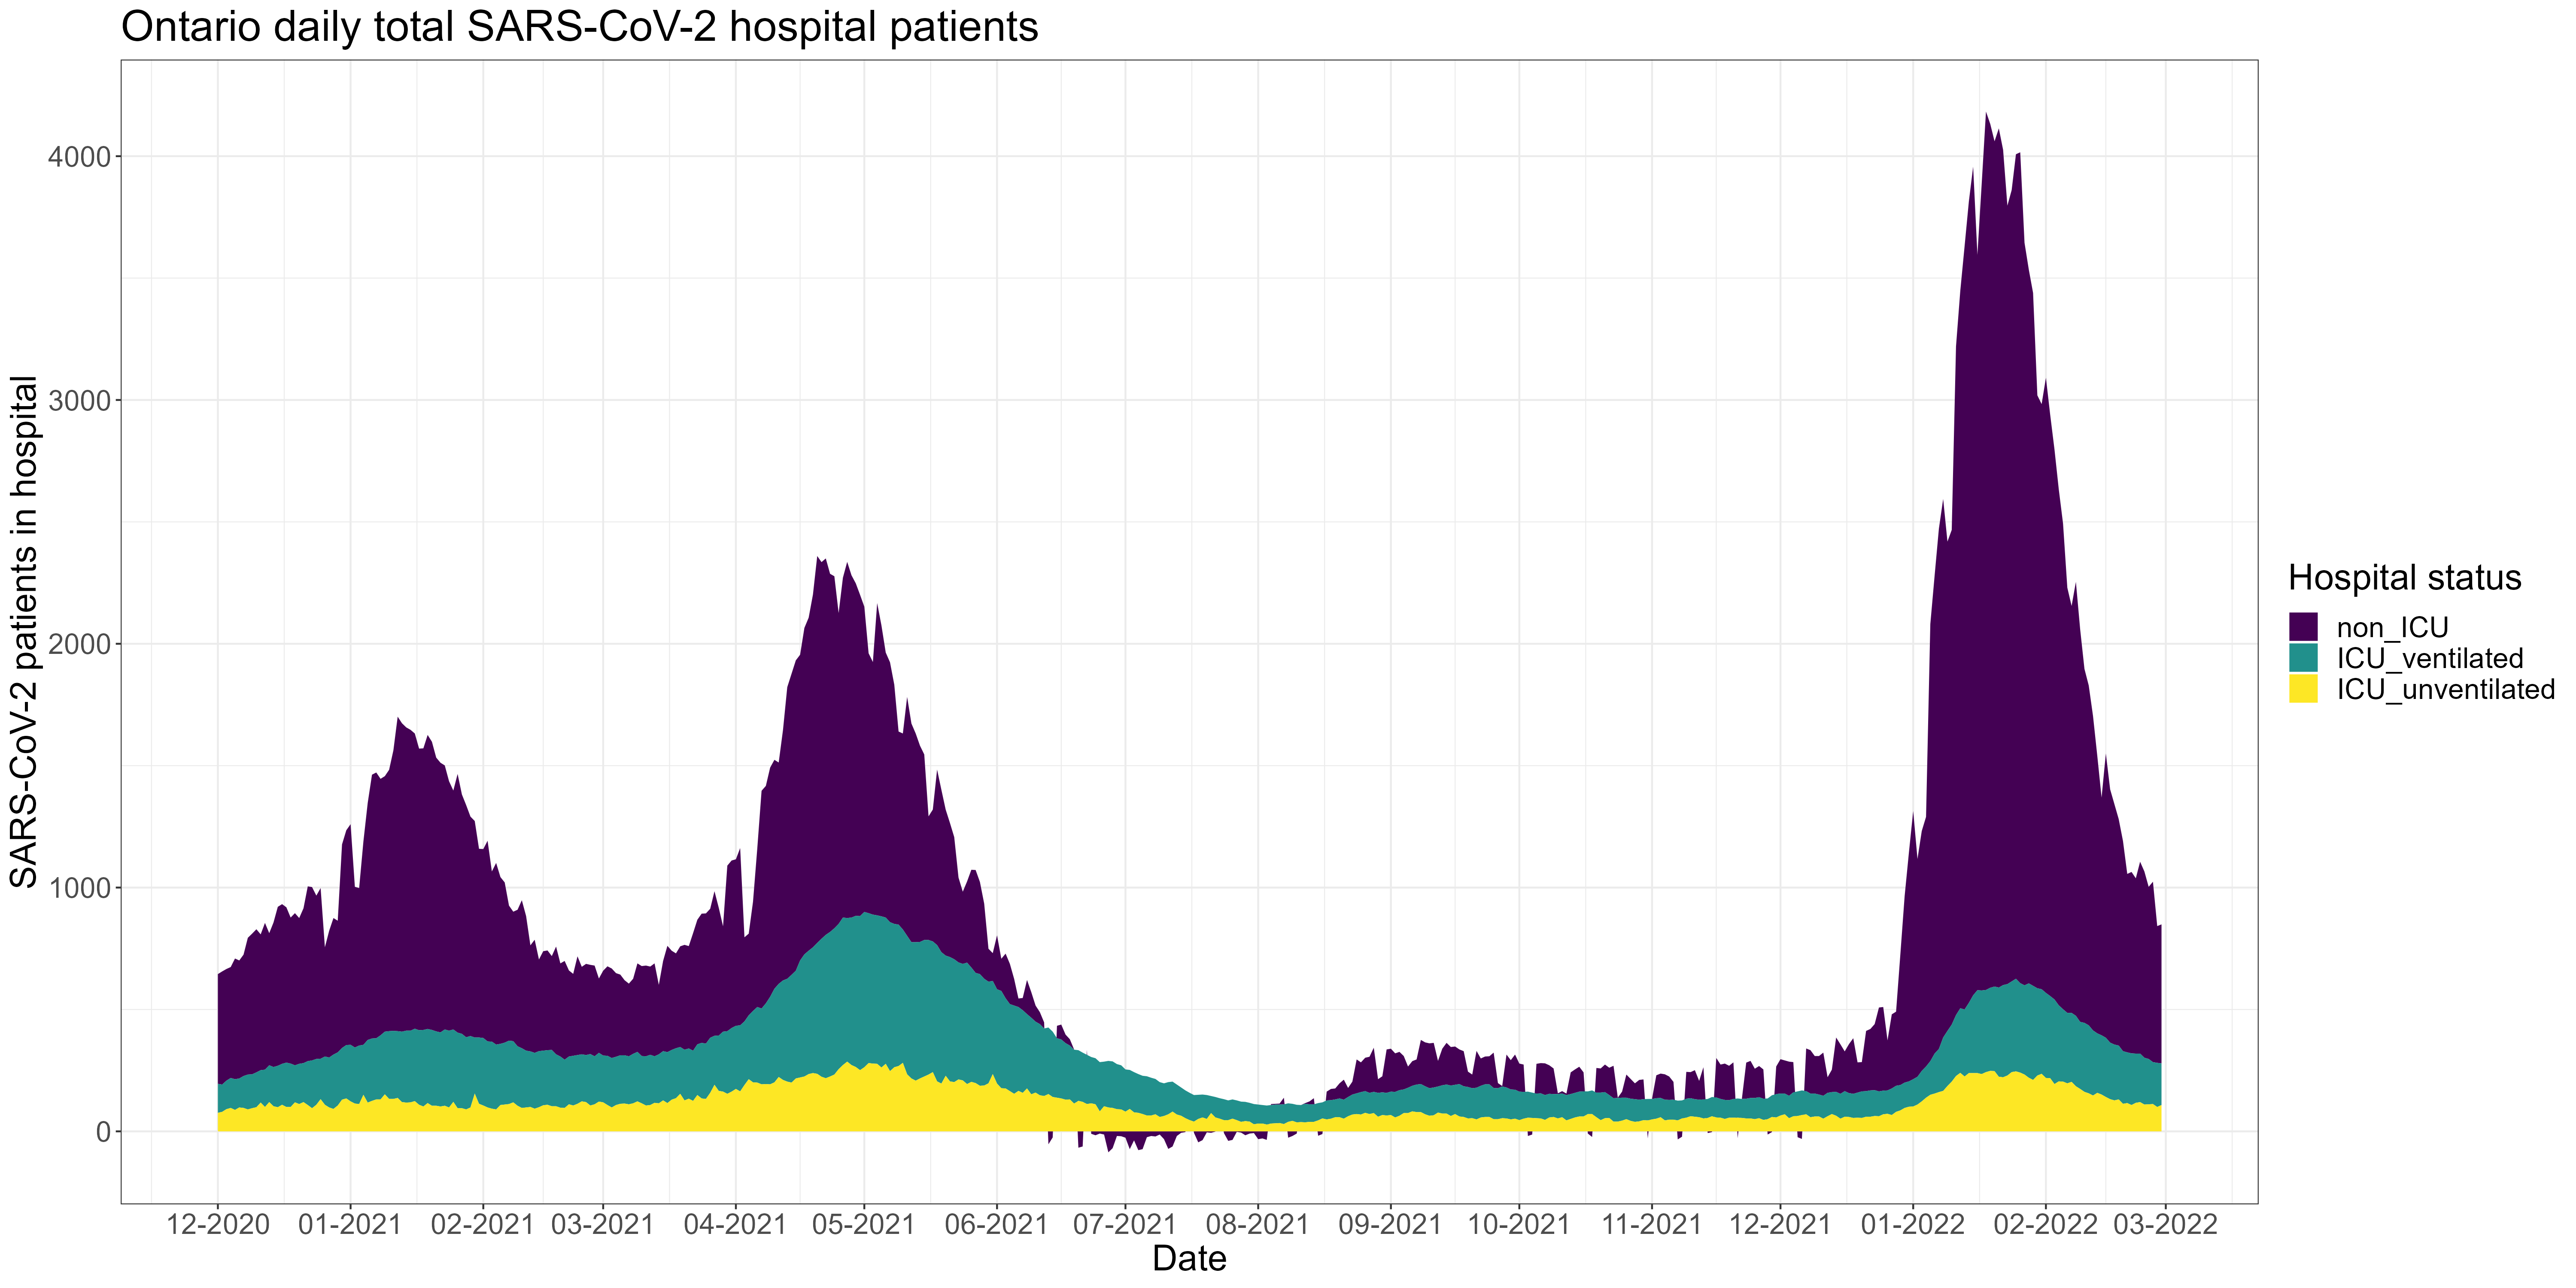

In [ ]:
# Adjust our plot window sizes to go a little wider
options(repr.plot.width=21, repr.plot.height=10)

hospital_cases_tidy.df %>% 
# filter the data
filter(...) %>%                                       

# 1. Data
ggplot(.) +
    # 2. Aesthetics
    aes(x = ...,                                                       
        y = ...,                                                           
        fill = fct_reorder(..., ..., .desc=TRUE)) + 
    
    # Simplify the theme
    
    # Set the labels
    
    # set our legend name
    
    # Use a color-blind-friendly palette
    
      
    # 3. Scaling
    scale_x_date(...) +                                      

    # 4. Geoms

***
# 3.0.0 Update your visualization by looking for cleaner data

Looking at our visualization we can see there are a few issues with the data. There are some very clear periodic regions in our data where our `non_ICU` values are calculated as negative. This can sometimes be due to discrepancies or lags in reporting as patients are moved from non_ICU to an ICU status. Let's import a separate dataset to wrangle in the hopes that the information is somewhat cleaner.

Import the data in `data/region_hospital_icu_covid_data.csv` for analysis.

In [ ]:
# Open your dataset with read_csv
regional_covid.df <- read_csv("data/region_hospital_icu_covid_data.csv")

# Take a quick look at the data
head(regional_covid.df)

# Look at the structure of covid_cases.df
str(regional_covid.df)

***
## 3.1.0 Wrangle the data for visualization using 

So our newly imported data is slightly different from before. There are far fewer columns of variables with just 9 total. We are interested in look at replicating our previous dataframe `hospital_cases_tidy.df`. To do that we need to match similar variables: 

- `hospitalizations`: Total COVID-related hospitalizations
- `icu_crci_total`: Total COVID-related ICU patients (a subset of hospitalization in theory)
- `icu_crci_total_vented`: Total ICU patients on ventilators

### 3.1.1 Group your data before summarizing it! (4 points)

Unlike our previous data which amalgamated summaries across health regions, our data is broken up by `oh_region` which consists of "WEST", "CENTRAL", "EAST", "NORTH", and "TORONTO". To combine all of the regions, you'll want to take the approach of grouping the data by `date`, removing the `oh_region` variable, and then summarizing within each group.

1. In order to `summarize()` across all columns, you'll want to use the `across()` option to help sum each variable. Otherwise, you'll have to explicitly create each summarized variable column. Check out the [across() function](https://dplyr.tidyverse.org/reference/across.html) from dplyr to apply a function across multiple columns.

2. From that you'll want to use the data to create a new dataframe with the same columns as before:

- `reported_data`: the date for the reported data
- `total_hospitalized`: how many patients are hospitalized with COVID-19
- `non_ICI`: how many of the above patients are not in the ICU
- `ICU_unventilated`: how many COVID-related ICU patients are not ventiliated
- `ICU_ventilated`: how many COVID-related ICU patients are ventilated

3. Finish your data by pivoting to a long format to create a 4-column data frame with:

|reported_date|total_hospitalized|hospital_status|patients|
| :-: | :-: | :-: | :-: |
| ... | ... | ... | ... | 

4. Save the final data frame as `regional_covid_grouped.df`.

In [ ]:
# Save the data as regional_covid_grouped.df
regional_covid_grouped.df <-
regional_covid.df %>% 
# group the data by date
...
# Drop the 2nd column
...
# For each group, take the sum of each column
...
# Make a new dataframe using transmute
transmute(reported_date = date,                                     
          total_hospitalized = ...,
          non_ICU = ...,
          ICU_unventilated = ...,
          ICU_ventilated = ...
         ) %>% 
# Pivot the data to a long-format
pivot_longer(...) 

# display the finalized dataset
tail(regional_covid_grouped.df)

***
## 3.2.0 Visualize the tidied regional hospitalization data (5 pts)

Using your data from above, you can now visualize this new dataset just as before. Use the dataframe `regional_covid_tidy.df` which was loaded from `data/Assignment01.RData` in your visualization. 

__Hint:__ Only annotations will be marked. Note the annotations, and their specifics (how boxes and arrows are coloured and pointed). Re-use and update your code from section 2.0.0! 

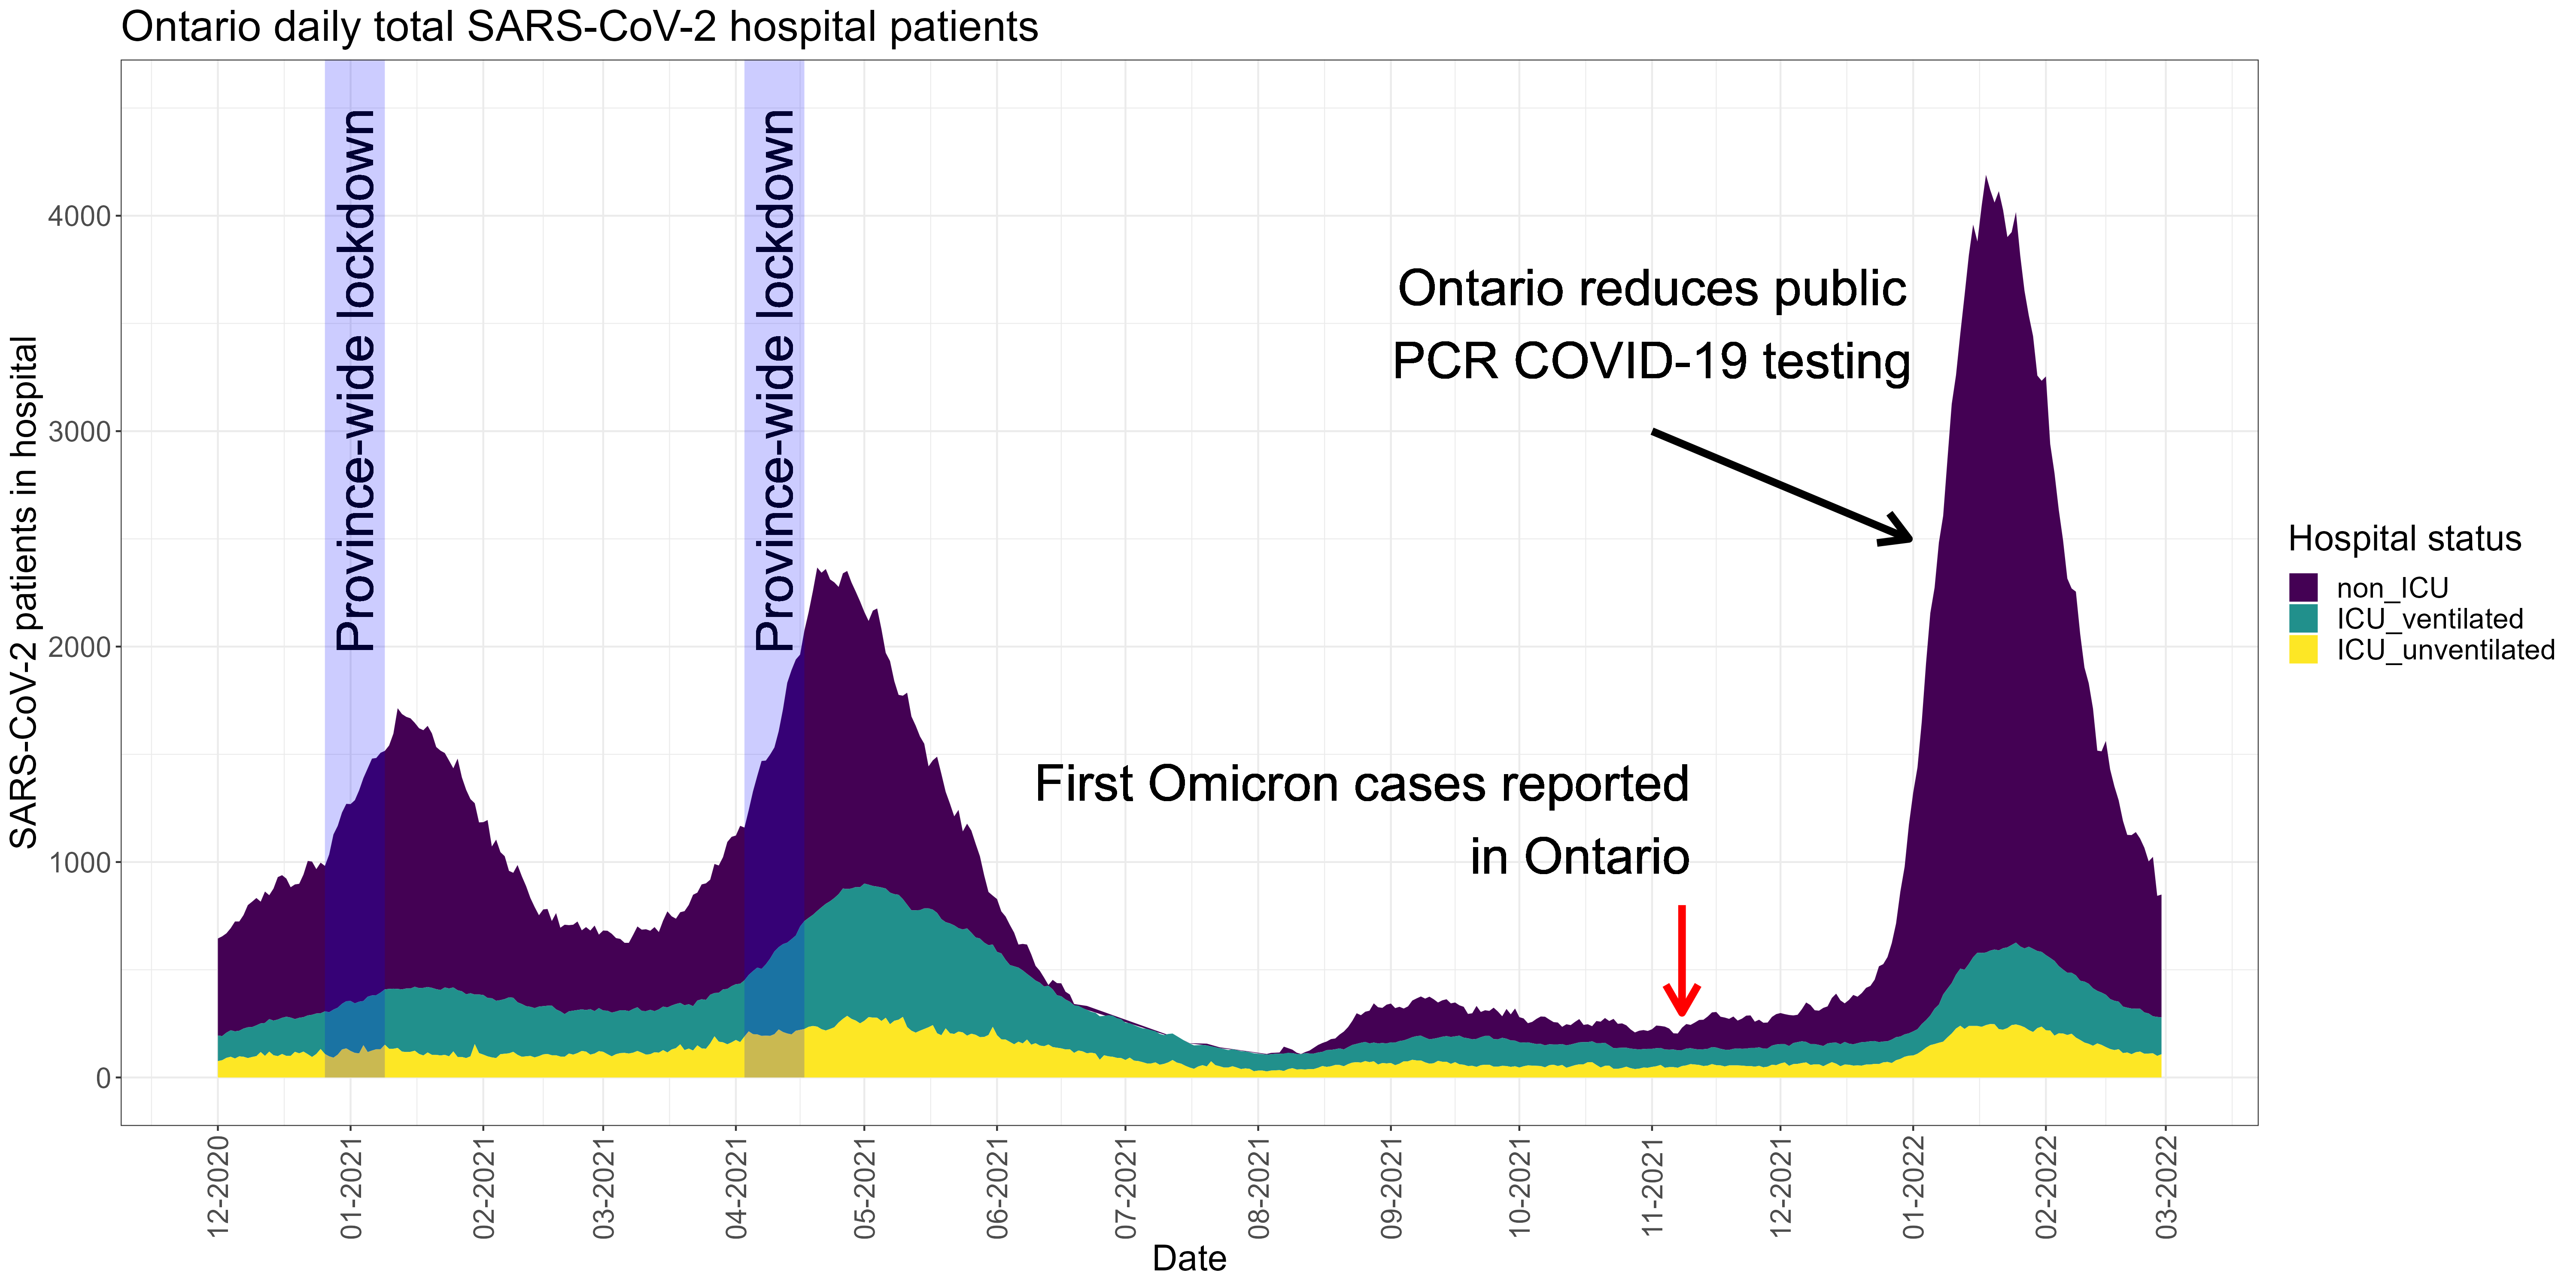

In [ ]:
# Take your data and filter it before plotting
regional_covid_tidy.df %>% 
filter(...) %>%  

# 1. Data
ggplot(.) +


***
|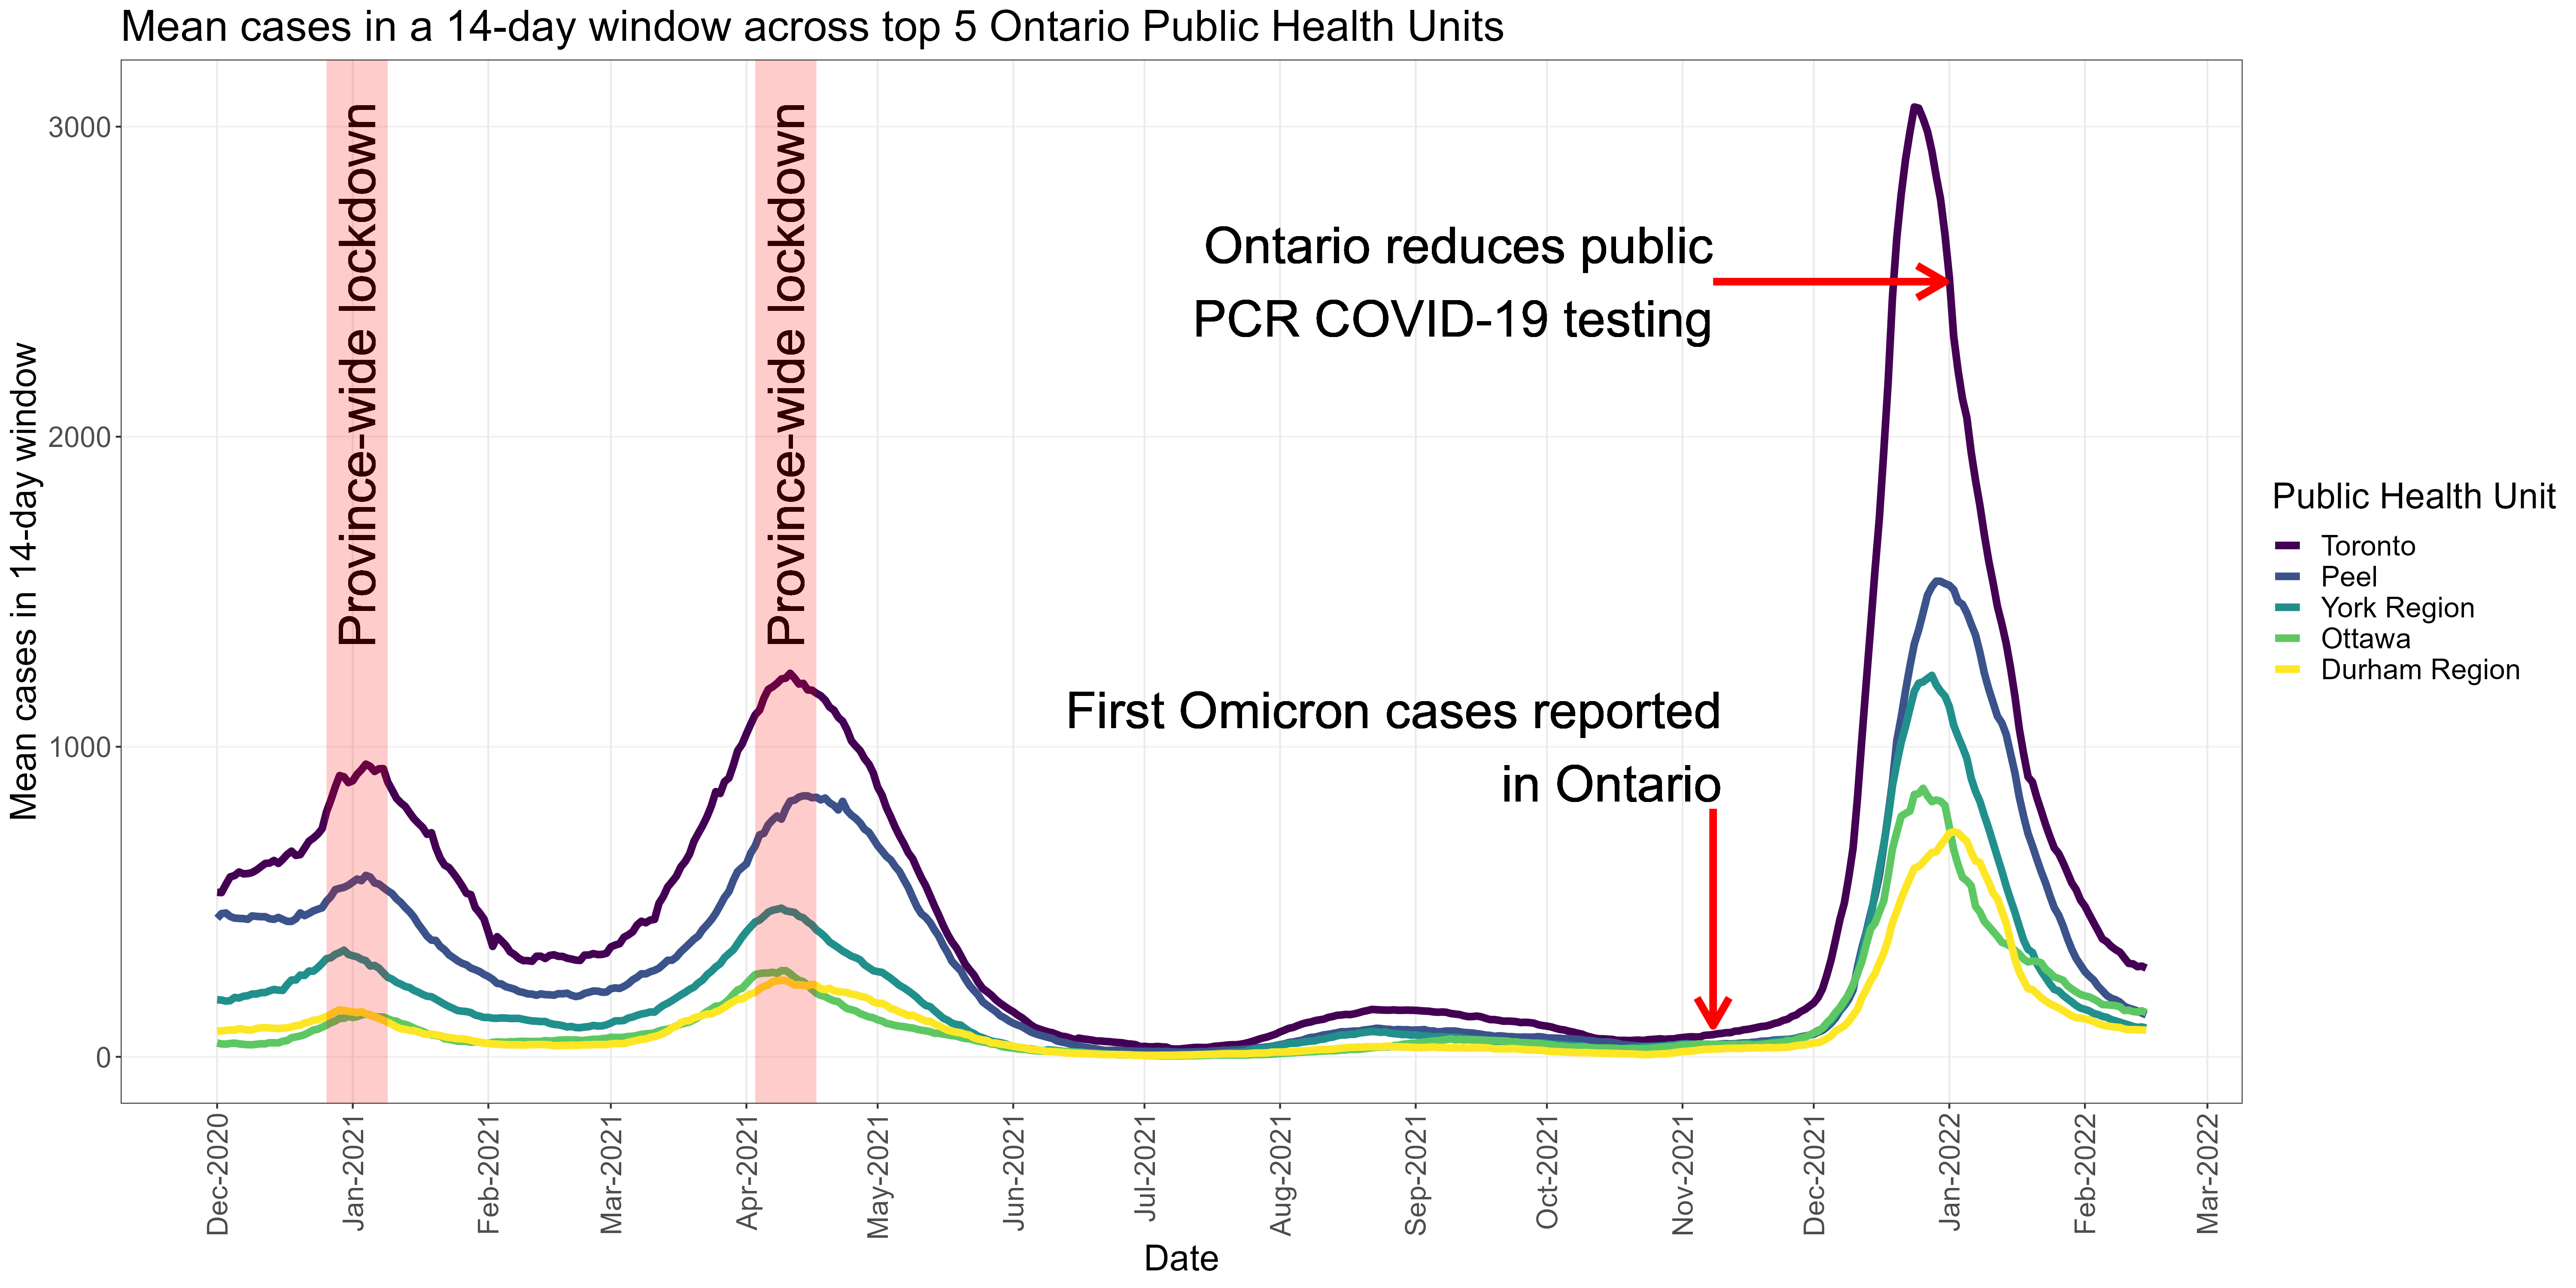|
|:-:|
|Recall our last visualization from lecture, which looked at the number of cases reported on a rolling 14-day window|

***
## 3.3.0 Compare and contrast positive cases to hospitalizations (7 points)

Comparing your visualization of observed hospitalizations versus the reported case counts visualized at the end of lecture, please answer the following questions.

#### Question 1: Using the annotations to guide you, what general trend do you see between the two sets of data during the December 2020 and April 2021 surges? (2 points)

Answer: 

#### Question 2: Does the omicron wave occurring in December of 2021 share the same trend from Q1 when comparing between the two datasets? What kind of relationship do you see? (2 points)

Answer:  

#### Question 3: Looking at the hospitalization data, compare the April 2021 surge to the December 2021 surge. What features of the "Hospital Status" composition during those periods, stands out most to you? What might explain the difference(s) in composition? How would you test one or more of your hypotheses? (3 points)

Answer: 

***
# 4.0.0 Assignment rubric

Please provide answers in markdown or code cells that immediately follow each question section. There are __56__ points distributed across this assignment.

|| Assignment breakdown ||
| :-: | :-: | :- | 
| Code | 50% | - Does it follow best practices? |
||| - Does it make good use of available packages? |
||| - Was data prepared properly |
| Answers and Output | 50% | - Is output based on the correct dataset? |
||| - Are groupings appropriate |
||| - Are correct titles/axes/legends correct? |
||| - Is interpretation of the graphs correct? |

Since coding styles and solutions can differ, students are encouraged to use best practices. Assignments _may_ be rewarded for well-coded or elegant solutions.

You can save and download the Jupyter notebook in its native format. Rename the file by prepending your first initial and last name ie `CMok_Lecture_01.Adv_graphics.assignment.student.ipynb`.Submit this file to the the appropriate assignment portal by 12pm on the date of our next class: March 10th, 2022.

## 4.1.0 Assignment Difficulty Feedback (1 point bonus)

Since this is still a rather new course, we are always looking to improve on material. Please answer the following questions:

1. Approximately how many hours did you spend completing this assignment?


2. On a scale of 1-10 please rate the difficulty of the assignment. 1 = simple and nothing was learned, 5 = challenging with helpful material learned, 10 = extremely difficult/unable to complete/frustratingly esoteric.


3. Any additional comments can be placed here.